# Import Packages

In [ ]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
class_names = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
              'Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Tomato___Bacterial_spot','Tomato___Early_blight',
              'Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Tomato_mosaic_virus']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [ ]:
def load_data():

    datasets = [r'C:\Users\DELL\Music\final-Medicinal\train', r'C:\Users\DELL\Music\final-Medicinal\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
def suggestions1(pred_labels):
    if (pred_labels == 0):
        print("Apple___Apple_scab")
        print("WET-STATE-USES:- Apply fungicide spray and remove infected leaves to prevent spread.")
        print("DRY-STATE-USES:- Avoid overhead watering and ensure good air circulation.")
    elif (pred_labels == 1):
        print("Apple___Black_rot")
        print("WET-STATE-USES:- Use copper-based fungicides early to reduce fungal spread.")
        print("DRY-STATE-USES:- Remove and dispose of affected fruits to stop further infection.")
    elif (pred_labels == 2):
        print("Apple___Cedar_apple_rust")
        print("WET-STATE-USES:- Prune galls and apply fungicides in early spring for prevention.")
        print("DRY-STATE-USES:- Plant resistant apple varieties to reduce infection risk.")
    elif (pred_labels == 3):
        print("Apple___healthy")
        print("WET-STATE-USES:- Maintain proper watering and balanced nutrients for plant health.")
        print("DRY-STATE-USES:- Regularly inspect plants and use organic disease prevention methods.")
    elif (pred_labels == 4):
        print("Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
        print("WET-STATE-USES:- Use resistant hybrids and apply fungicide at early infection stages.")
        print("DRY-STATE-USES:- Rotate crops annually and maintain field hygiene.")
    elif (pred_labels == 5):
        print("Corn_(maize)___Common_rust_")
        print("WET-STATE-USES:- Apply sulfur-based fungicides at the first sign of rust.")
        print("DRY-STATE-USES:- Avoid planting susceptible corn varieties in humid areas.")
    elif (pred_labels == 6):
        print("Corn_(maize)___healthy")
        print("WET-STATE-USES:- Ensure good soil health and nitrogen balance for strong resistance.")
        print("DRY-STATE-USES:- Remove infected leaves and avoid excessive nitrogen fertilizers.")
    elif (pred_labels == 7):
        print("Corn_(maize)___Northern_Leaf_Blight")
        print("WET-STATE-USES:- Apply foliar fungicide and plant disease-resistant corn varieties.")
        print("DRY-STATE-USES:- Provide adequate spacing between plants to improve airflow.")
    elif (pred_labels == 8):
        print("Tomato___Bacterial_spot")
        print("WET-STATE-USES:- Use copper sprays and bactericides to control bacterial infections.")
        print("DRY-STATE-USES:- Water plants at the base to prevent bacterial spread.")
    elif (pred_labels == 9):
        print("Tomato___Early_blight")
        print("WET-STATE-USES:- Prune infected leaves and apply a copper-based fungicide.")
        print("DRY-STATE-USES:- Use mulch to prevent soil-borne fungi from splashing onto leaves.")
    elif (pred_labels == 10):
        print("Tomato___healthy")
        print("WET-STATE-USES:- Ensure optimal soil nutrients and moisture levels.")
        print("DRY-STATE-USES:- Practice crop rotation and ensure proper plant spacing.")
    elif (pred_labels == 11):
        print("Tomato___Late_blight")
        print("WET-STATE-USES:- Apply fungicides and remove infected plant debris.")
        print("DRY-STATE-USES:- Avoid watering late in the day to reduce moisture on leaves.")
    elif (pred_labels == 12):
        print("Tomato___Leaf_Mold")
        print("WET-STATE-USES:- Improve ventilation in greenhouses and avoid excessive humidity.")
        print("DRY-STATE-USES:- Apply biofungicides and remove infected leaves early.")
    elif (pred_labels == 13):
        print("Tomato___Septoria_leaf_spot")
        print("WET-STATE-USES:- Use organic fungicides like neem oil to prevent further spread.")
        print("DRY-STATE-USES:- Avoid water splashes on leaves and maintain dry foliage.")
    elif (pred_labels == 14):
        print("Tomato___Tomato_mosaic_virus")
        print("WET-STATE-USES:- Remove infected plants immediately and control insect vectors.")
        print("DRY-STATE-USES:- Use virus-resistant tomato varieties for long-term prevention.")
    else:
        print("Unknown Disease")
        print("WET-STATE-USES:- Regularly monitor plants for early symptoms.")
        print("DRY-STATE-USES:- Use disease-resistant plant varieties to minimize infections.")

# Example Usage
pred_labels = 3  # Example label
suggestions1(pred_labels)


Apple___healthy
WET-STATE-USES:- Maintain proper watering and balanced nutrients for plant health.
DRY-STATE-USES:- Regularly inspect plants and use organic disease prevention methods.


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\DELL\Music\final-Medicinal\train


100%|██████████| 373/373 [00:03<00:00, 105.10it/s]


Loading C:\Users\DELL\Music\final-Medicinal\test


100%|██████████| 99/99 [00:00<00:00, 173.02it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 16746
Number of testing examples: 1346
Each image is of size: (150, 150)


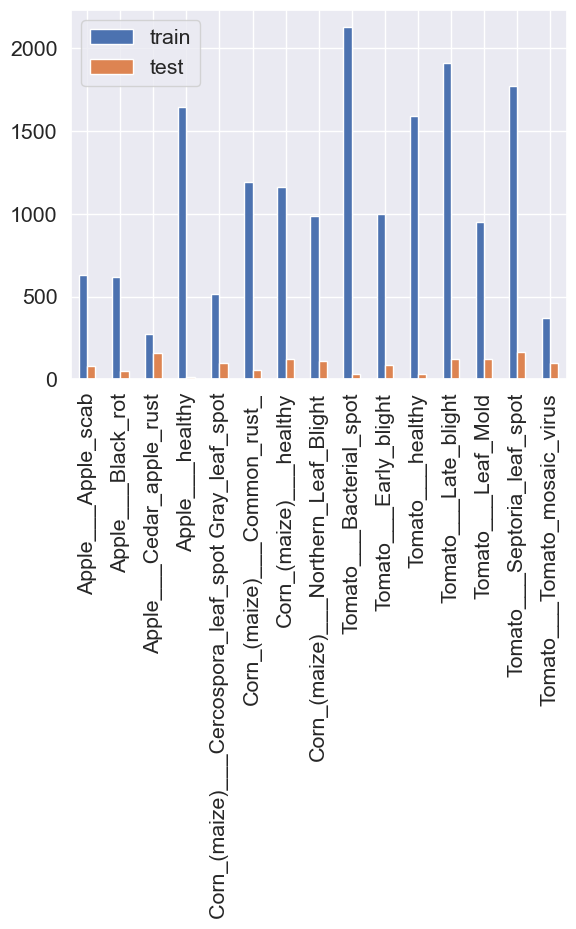

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

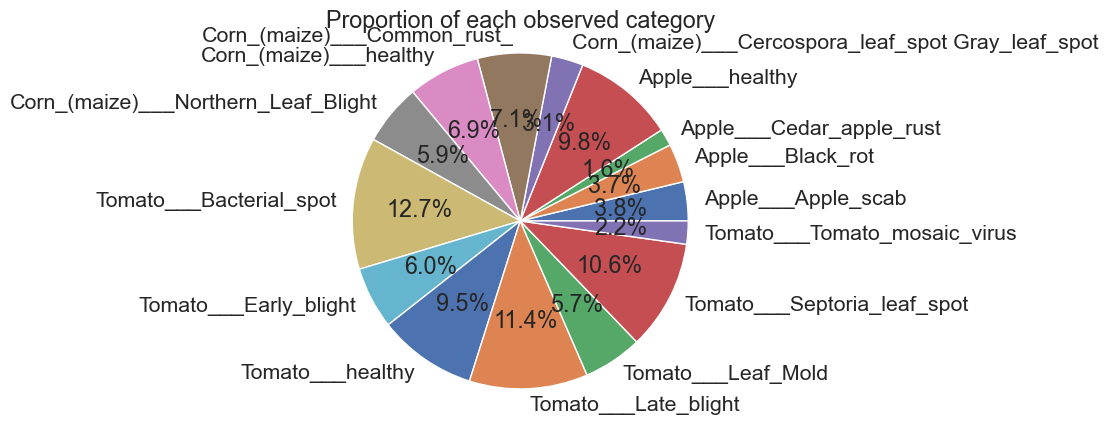

In [ ]:
plt.pie(train_counts,
        explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

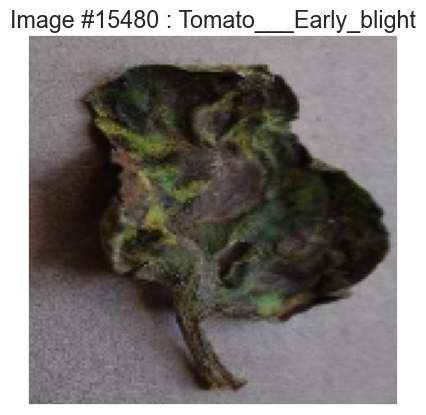

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with their corresponding labels.
    """
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)

    for i, ax in enumerate(axes.flat):  # Flatten the 2D axes array
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(class_names[labels[i]], fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
    plt.show()



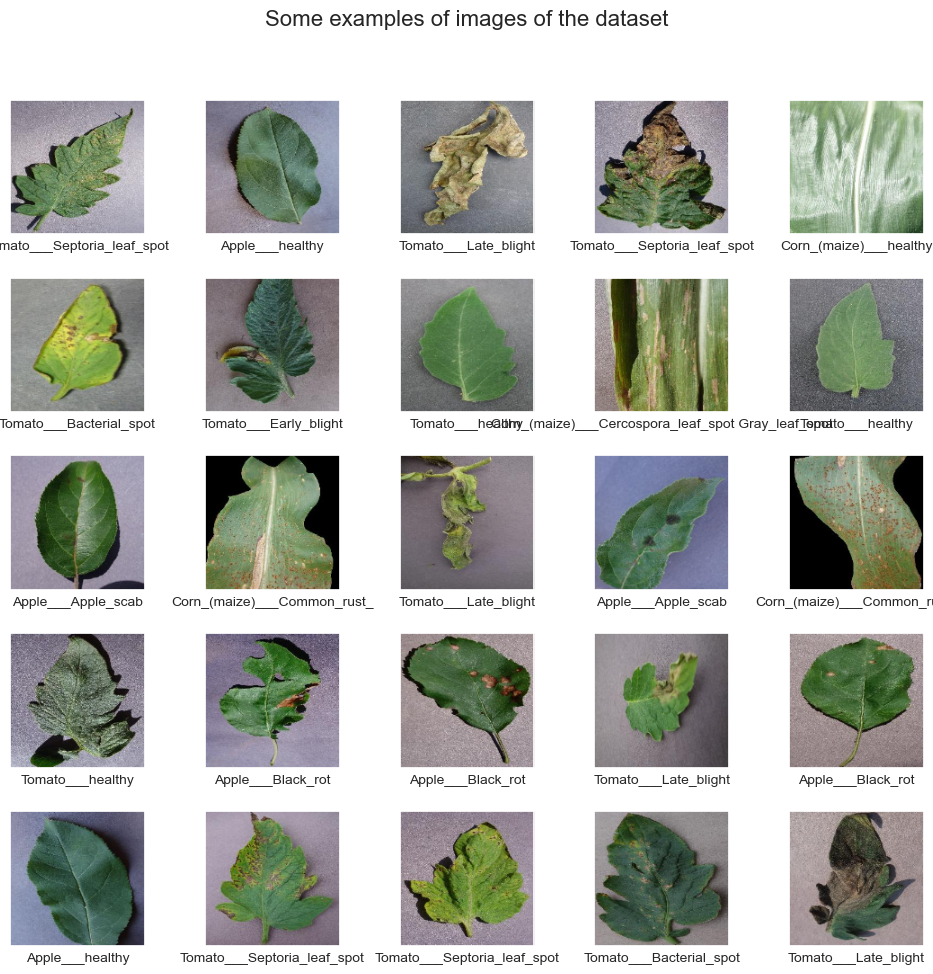

In [ ]:
display_examples(class_names, train_images, train_labels)

# CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\DELL\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\DELL\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\DELL\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\DELL\anaconda3\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\DELL\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\603443515.py", line 1, in <module>

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 368, in fit

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 216, in function

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 129, in multi_step_on_iterator

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in one_step_on_data

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 59, in train_step

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 399, in _compute_loss

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 367, in compute_loss

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 692, in __call__

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 701, in call

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 2241, in sparse_categorical_crossentropy

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1841, in sparse_categorical_crossentropy

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 714, in sparse_categorical_crossentropy

Received a label value of 14 which is outside the valid range of [0, 10).  Label values: 8 13 13 11 8 7 11 3 4 10 14 3 13 7 9 14 8 9 5 12 8 13 14 8 5 6 10 13 9 10 13 4 6 5 9 3 13 6 8 8 3 10 3 0 8 8 5 8 11 4 13 3 13 7 13 12 11 11 8 10 1 1 13 6 7 5 3 8 2 10 10 0 13 12 13 6 7 3 6 10 5 11 8 12 8 4 11 9 0 13 5 10 12 13 8 8 8 12 3 13 11 11 13 12 2 10 12 13 10 8 3 5 12 0 10 14 1 8 11 12 0 9 3 5 5 9 0 5
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_1622]

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9325 - loss: 0.3252


In [ ]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(150,150, 3))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(13, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 59,650,061 (227.55 MB)

 Trainable params: 6,837,773 (26.08 MB)

 Non-trainable params: 52,812,288 (201.46 MB)

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 162s 28s/step - accuracy: 0.2554 - loss: 2.1796 - val_accuracy: 0.6667 - val_loss: 1.2852
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 22s/step - accuracy: 0.9079 - loss: 0.4872 - val_accuracy: 0.7895 - val_loss: 2.2742
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 22s/step - accuracy: 0.9658 - loss: 0.1226 - val_accuracy: 0.9123 - val_loss: 2.0633
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 22s/step - accuracy: 0.9954 - loss: 0.0270 - val_accuracy: 0.8772 - val_loss: 2.8782
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 22s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.8509 - val_loss: 3.3011


In [ ]:
test_loss = model2.evaluate(test_images, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.9498 - loss: 0.6948


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Define the dimensions of your input images
height = 150
width = 150
channels = 3

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG16
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(10, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)


Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_2' is trainable
Layer 'dense_5' is trainable


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_disease.h5.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [ ]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

opt = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model3.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model3.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          81,930 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,796,618 (56.44 MB)

 Trainable params: 14,684,042 (56.02 MB)

 Non-trainable params: 112,576 (439.75 KB)

In [ ]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Resize images to match the model's input shape
train_images_resized = tf.image.resize(train_images, (150, 150))

# Now, you can use train_images_resized as input to your model
history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=5, validation_split=0.2)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 244s 57s/step - accuracy: 0.1052 - loss: 2.9233 - val_accuracy: 0.1140 - val_loss: 2.3227
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 242s 60s/step - accuracy: 0.1198 - loss: 2.3950 - val_accuracy: 0.1140 - val_loss: 2.3178
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 245s 60s/step - accuracy: 0.0909 - loss: 2.3063 - val_accuracy: 0.1667 - val_loss: 2.2675
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 223s 54s/step - accuracy: 0.0985 - loss: 2.2799 - val_accuracy: 0.1228 - val_loss: 2.4620
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 214s 53s/step - accuracy: 0.0939 - loss: 2.3347 - val_accuracy: 0.0614 - val_loss: 2.2848


In [ ]:
test_loss = model3.evaluate(test_images, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.0187 - loss: 2.2388


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
WET-STATE-USES:-applied directly to the affected area for dandruff,fungal infections
DRY-STATE-USES:-Hair and Scalp Health
[6]


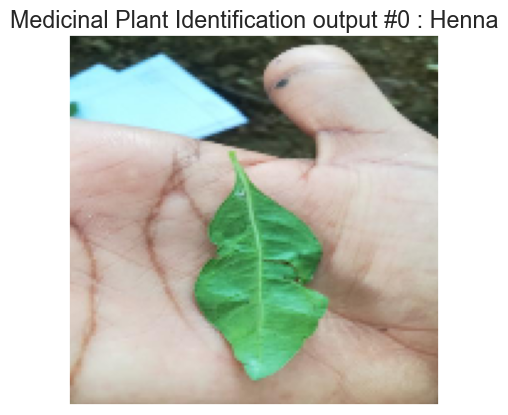

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\LENOVO\Music\DSP-A-23-24\STANLEY\final-Medicinal-Stanley\final-Medicinal-Stanley(1)\test\Henna\352.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
WET-STATE-USES:-treat skin problems (burns, wounds, and anti-inflammatory processes)
DRY-STATE-USES:-It may improve skin and prevent wrinkles
[0]


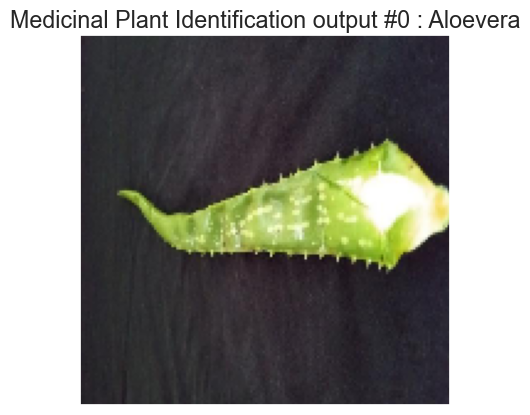

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\LENOVO\Music\DSP-A-23-24\STANLEY\final-Medicinal-Stanley\final-Medicinal-Stanley(1)\test\aloevera\138.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model2.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
WET-STATE-USES:-various skin problems like acne, pimples, skin rashes and skin allergies
DRY-STATE-USES:-Dental Care
[8]


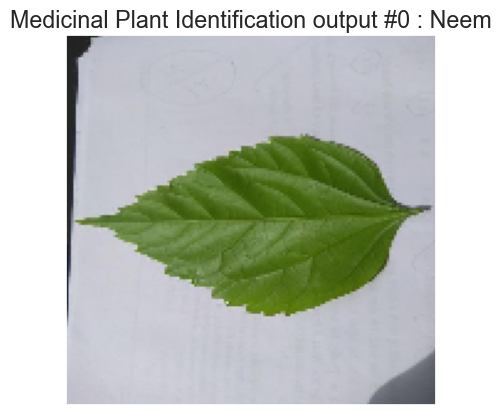

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\LENOVO\Music\DSP-A-23-24\STANLEY\final-Medicinal-Stanley\final-Medicinal-Stanley(1)\test\Hibiscus\514.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model3.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


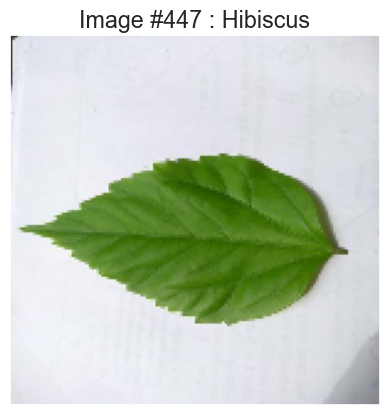

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

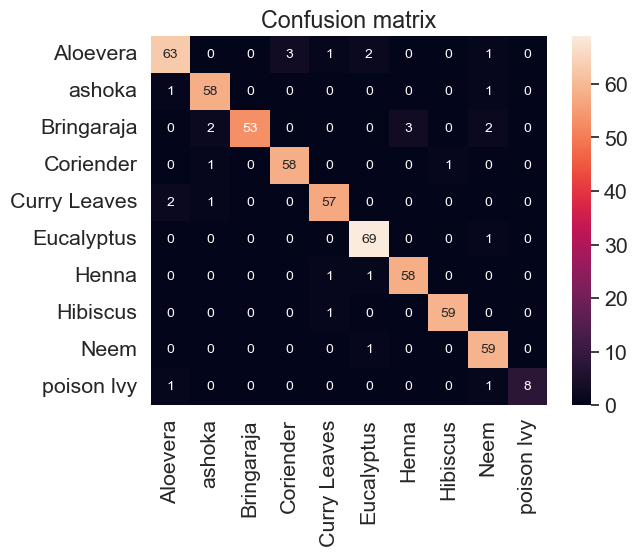

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.9520600183497765
Recall: 0.9508771929824561
F1 Score: 0.950586994680278
Custom Accuracy: 0.9508771929824561


In [ ]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Aloevera       0.94      0.90      0.92        70
      ashoka       0.94      0.97      0.95        60
  Bringaraja       1.00      0.88      0.94        60
   Coriender       0.95      0.97      0.96        60
Curry Leaves       0.95      0.95      0.95        60
  Eucalyptus       0.95      0.99      0.97        70
       Henna       0.95      0.97      0.96        60
    Hibiscus       0.98      0.98      0.98        60
        Neem       0.91      0.98      0.94        60
  poison lvy       1.00      0.80      0.89        10

    accuracy                           0.95       570
   macro avg       0.96      0.94      0.95       570
weighted avg       0.95      0.95      0.95       570



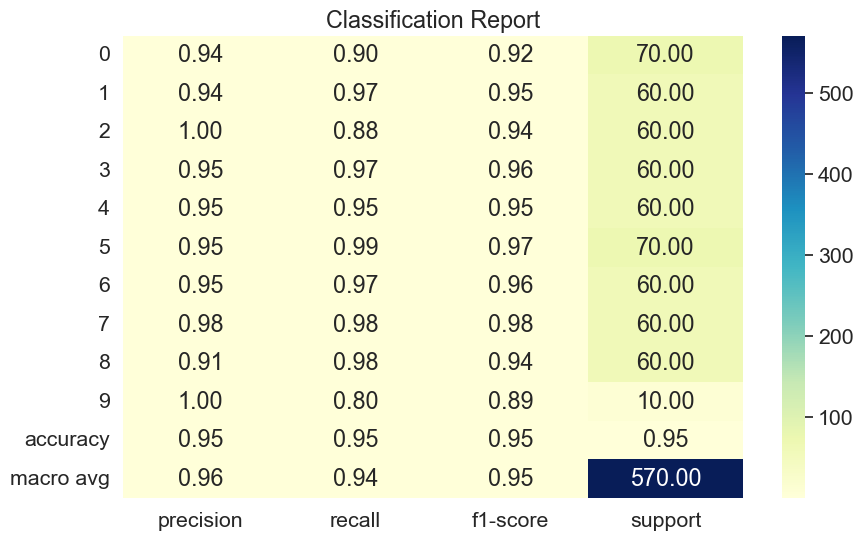

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

# CNN-DENSE MODEL-FLASK

In [ ]:
model.save_weights("model_dense.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json=model.to_json()
with open("model_dense.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_dense.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['Aloevera','ashoka','Bringaraja','Coriender','Curry Leaves',
                   'Eucalyptus','Henna','Hibiscus','Neem','poison lvy']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


# CNN-RESNET MODEL-FLASK

In [ ]:
model2.save_weights("model_resnet.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json=model2.to_json()
with open("model_resnet.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_resnet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['Aloevera','ashoka','Bringaraja','Coriender','Curry Leaves',
                   'Eucalyptus','Henna','Hibiscus','Neem','poison lvy']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home 1.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home 1.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify 1.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Jun/2024 15:04:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2024 15:04:47] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:04:47] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:04:47] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\336.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


127.0.0.1 - - [17/Jun/2024 15:04:57] "POST /classify HTTP/1.1" 200 -


[1.4169619e-05 6.9929871e-07 4.4419452e-05 1.7564711e-08 1.2764004e-07
 3.3062672e-06 9.9993539e-01 3.2671579e-07 8.4021457e-07 6.0615486e-07]


127.0.0.1 - - [17/Jun/2024 15:04:57] "GET /classify/336.jpg HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2024 15:04:57] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:04:57] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


# CNN-VGG-16 MODEL-FLASK

In [ ]:
model3.save_weights("model_vgg16.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json=model3.to_json()
with open("model_vgg16.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg16.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['Aloevera','ashoka','Bringaraja','Coriender','Curry Leaves',
                   'Eucalyptus','Henna','Hibiscus','Neem','poison lvy']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home 2.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home 2.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify 2.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Jun/2024 15:05:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2024 15:05:41] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:05:41] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:05:41] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\138.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


127.0.0.1 - - [17/Jun/2024 15:05:59] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2024 15:05:59] "GET /classify/138.jpg HTTP/1.1" 200 -


[1.3453458e-06 5.0656382e-07 1.9333299e-06 9.9996519e-01 1.8088656e-07
 2.1247726e-05 2.0408206e-07 2.8007751e-06 6.5047834e-06 2.0540219e-07]


127.0.0.1 - - [17/Jun/2024 15:05:59] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [17/Jun/2024 15:05:59] "GET /static/images/bg.jpeg HTTP/1.1" 304 -
